## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import operator as op
import seaborn as sns
from tabulate import tabulate
import math
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_context("talk")
sns.set(style="darkgrid")

operatorlookup = {
    '+': op.add,
    '-': op.sub,
    '*': op.mul,
    '/': op.truediv
}
%matplotlib inline

/home/monish/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/monish/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Functions

In [7]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

def get_meta_data(df,filename):
    with open("car_pricing_metadata.txt", 'w') as f:
        f.write(cap.stdout)
    print(create_meta_data_file(df, filename))


def transform_data(df):
    le = LabelEncoder()
    col_trns=[cat_cols for cat_cols in df.select_dtypes(include='object').columns]
        
    for col in col_trns:
        col_name = 'enc_'+col
        df.loc[:,col_name] = le.fit_transform(df[col])

def create_dummy_vars(df, col_name, prefix_name, prefix_seprtr):
    df_dummy=pd.get_dummies(df[col_name], prefix=prefix_name, prefix_sep=prefix_seprtr, drop_first=True)
#     print(tabulate(df_dummy, headers='keys', tablefmt="grid"))
    df = pd.concat([df,df_dummy], axis='columns')
    return df
    
    

def create_plots():
    pass

def perform_univariate_analysis():
    pass

def calculate_prcnt(group):
    return str(round(((group).sum()/(car_pricing['price'].sum()))*100,2))+'%'

def calculate_crosstab_percnt(cols=None, rows=None, df=None):
    pvt_tbl = pd.pivot_table(data=df,index=rows, columns=cols, aggfunc=calculate_prcnt, \
                             fill_value='NA')
    return pvt_tbl

def create_reg_model(df=None,target_var=None,model_params=None):
#     print(model_params)
    X_train = df.drop(target_var,axis='columns')
    y_train = df[target_var]
    X_train_ = sm.add_constant(X_train[model_params].to_numpy())
    lr_model = sm.OLS(y_train, X_train_).fit()
    print(lr_model.summary())
    return {'model_features':X_train[model_params],'model':lr_model}

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, X_val) for X_val in range(X.shape[1])]
    vif["features"] = X.columns
    print(tabulate(vif, headers='keys', tablefmt="grid"))

def evaluate_model():
    pass

def get_model_diagnostic_plots(y_actual, y_predicted):
    residual = y_actual - y_predicted
    fig, ax = plt.subplots(2,2,figsize=(16,10), constrained_layout=True)
    sns.residplot(y_actual, y_predicted, lowess=True, color="blue", ax=ax[0][0]);
    sns.scatterplot(y_actual, y_predicted, color="blue", ax=ax[0][1]);
    sp.stats.probplot(residual, plot=ax[1][0], fit=True);
    sns.distplot(residual, ax=ax[1][1])
#     fig.delaxes(ax[1][1])

def test_model(df, target_var, numeric_transform_vars, features, model):
    df.loc[:, numeric_transform_vars] = scaler.fit_transform(df.loc[:,numeric_transform_vars])
    X_test = df.drop(target_var, axis='columns')
    y_actual = df[target_var]
    
    X_test_ = sm.add_constant(X_test[features])
    y_predicted  = model.predict(X_test_)
    return y_actual, y_predicted

def make_prediction(df=None, features=None, tar_var=None, model=None):
    y_actual = df[tar_var]
    df_ = sm.add_constant(df[features])
    y_pred = model.predict(df_)
    return y_actual, y_pred



In [8]:
def create_meta_data_file(dataframe,filename):   

    meta_data = pd.read_csv('car_pricing_metadata.txt', sep='\t')
    meta_data['column_name'] = meta_data.iloc[:,:].apply(lambda x:x[0].split(' ',1)[0], axis=1)
    meta_data['data_type'] = meta_data.iloc[:,:].apply(lambda x:x[0].split(' ',1)[1], axis=1)
    meta_data = meta_data.iloc[2:len(meta_data)-2,1:]
    print(meta_data.shape)

    meta_data['data_format'] = meta_data['data_type'].apply(lambda val: val.lstrip().split(' ')[2])
    meta_data['null_object_type'] = meta_data['data_type'].apply(lambda val: val.lstrip().split(' ')[1])
    meta_data['no_of_rows'] = meta_data['data_type'].apply(lambda val: val.lstrip().split(' ')[0])
    
    del meta_data['data_type']
    
    meta_data['missing_percent'] = meta_data['no_of_rows'].astype('float')/dataframe.shape[0]
    meta_data['missing_percent'] = (1-(round(meta_data['no_of_rows'].astype('float')\
                                                   /dataframe.shape[0],2)))*100
    meta_data.to_csv(filename+'.csv', index=False)
    return meta_data

In [9]:
car_pricing = read_data('CarPrice_Assignment.csv')

In [10]:
%%capture cap --no-stderr
car_pricing.info(max_cols=120)


In [11]:
get_meta_data(car_pricing,'car_pricing');

(28, 2)


ValueError: could not convert string to float: '#'

In [ ]:
create_meta_data_file()

## Data Cleaning

In [1046]:
car_pricing.loc[:,'Car_Compny'] = car_pricing.CarName.apply(lambda car_cmpny: car_cmpny.split(' ')[0])

In [1047]:
car_pricing['carvolume'] = car_pricing['carheight']*car_pricing['carwidth']*car_pricing['carlength']
car_pricing['mpg_enginsize_ratio'] = car_pricing['citympg']/car_pricing['enginesize']

In [1048]:
car_pricing.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [1049]:
car_pricing.loc[car_pricing.carbody.isin(['convertible','hardtop']),'car_body_new_cats'] = 'carbody_a'
car_pricing.loc[~(car_pricing.carbody.isin(['convertible','hardtop'])),'car_body_new_cats']= 'carbody_b'


In [1050]:
car_pricing.loc[car_pricing.enginetype=='dohc','enginetype_new_cats']='eng_a'
car_pricing.loc[car_pricing.enginetype=='ohcv','enginetype_new_cats']='eng_b'
car_pricing.loc[car_pricing.enginetype=='dohcv','enginetype_new_cats']='eng_c'
car_pricing.loc[~car_pricing.enginetype.isin(['dohcv','ohcv','dohc']),'enginetype_new_cats']='eng_d'


In [1051]:
car_pricing.loc[car_pricing.cylindernumber.isin(['two','three','four']),'cylindernumber_new_cats']='cno_a'
car_pricing.loc[car_pricing.cylindernumber.isin(['five','six']),'cylindernumber_new_cats']='cno_b'
car_pricing.loc[car_pricing.cylindernumber.isin(['twelve','eight']),'cylindernumber_new_cats']='cno_c'



In [1093]:
transform_data(car_pricing)

In [1090]:
# car_pricing = create_dummy_vars(car_pricing,'cylindernumber_new_cats','dummy','_');
car_pricing = create_dummy_vars(car_pricing,'car_body_new_cats','dummy','_');

In [1091]:
car_pricing.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Car_Compny', 'carvolume', 'mpg_enginsize_ratio',
       'car_body_new_cats', 'enginetype_new_cats', 'cylindernumber_new_cats',
       'enc_CarName', 'enc_fueltype', 'enc_aspiration', 'enc_doornumber',
       'enc_carbody', 'enc_drivewheel', 'enc_enginelocation', 'enc_enginetype',
       'enc_cylindernumber', 'enc_fuelsystem', 'enc_Car_Compny',
       'enc_car_body_new_cats', 'enc_enginetype_new_cats',
       'enc_cylindernumber_new_cats', 'dummy_cno_b', 'dummy_cno_c',
       'dummy_carbody_b'],
      dtype='object')

## Data Exploration

### Numeric Analysis

In [1395]:
calculate_crosstab_percnt(df=car_pricing[['price','fueltype','Car_Compny']],\
                          rows='Car_Compny', cols='fueltype')

price        
fueltype    diesel     gas
Car_Compny                
Nissan          NA    0.2%
alfa-romero     NA   1.71%
audi            NA   4.59%
bmw             NA   7.68%
buick        4.17%   5.72%
chevrolet       NA   0.66%
dodge           NA    2.6%
honda           NA   3.91%
isuzu           NA   1.31%
jaguar          NA   3.81%
maxda           NA   0.41%
mazda        1.07%   5.17%
mercury         NA   0.61%
mitsubishi      NA   4.41%
nissan       0.26%   6.43%
peugeot       2.9%   3.36%
plymouth        NA   2.05%
porcshce        NA    1.2%
porsche         NA   4.57%
renault         NA   0.71%
saab            NA   3.36%
subaru          NA   3.77%
toyota       0.97%  10.07%
toyouta         NA   0.58%
vokswagen    0.29%      NA
volkswagen   1.15%   2.21%
volvo        0.83%   6.47%
vw              NA   0.79%

In [1055]:
calculate_crosstab_percnt(df=car_pricing[['price','enginetype','fueltype']],\
                          rows='enginetype', cols='fueltype')

price        
fueltype   diesel     gas
enginetype               
dohc           NA   7.99%
dohcv          NA   1.15%
l            2.9%   3.55%
ohc         8.74%   54.2%
ohcf           NA   7.57%
ohcv           NA  11.99%
rotor          NA   1.91%

In [1056]:
calculate_crosstab_percnt(df=car_pricing[['price','carbody','fueltype']],\
                          rows='carbody', cols='fueltype')

price        
fueltype    diesel     gas
carbody                   
convertible     NA   4.83%
hardtop      1.04%   5.49%
hatchback    0.29%   26.4%
sedan        8.14%  42.45%
wagon        2.17%   9.19%

In [1089]:
calculate_crosstab_percnt(df=car_pricing[['price','carbody','enginetype']],\
                          rows='carbody', cols='enginetype')

price                                           
enginetype    dohc  dohcv      l     ohc   ohcf   ohcv  rotor
carbody                                                      
convertible   1.1%     NA     NA   1.08%  1.36%  1.29%     NA
hardtop         NA     NA     NA   2.41%  2.45%  1.67%     NA
hatchback    2.21%  1.15%  0.19%  17.85%  0.73%  2.64%  1.91%
sedan        4.09%     NA  4.05%  34.92%  1.67%  5.86%     NA
wagon        0.58%     NA  2.21%   6.68%  1.37%  0.53%     NA

In [1088]:
calculate_crosstab_percnt(df=car_pricing[['price','cylindernumber','enginetype']],\
                          rows='cylindernumber', cols='enginetype')

price                                           
enginetype       dohc  dohcv      l     ohc   ohcf   ohcv  rotor
cylindernumber                                                  
eight              NA  1.15%     NA      NA     NA  5.72%     NA
five               NA     NA     NA   8.74%     NA     NA     NA
four            3.15%     NA  6.26%  46.92%  3.77%     NA     NA
six             4.84%     NA     NA   7.28%  3.81%  4.95%     NA
three              NA     NA  0.19%      NA     NA     NA     NA
twelve             NA     NA     NA      NA     NA  1.32%     NA
two                NA     NA     NA      NA     NA     NA  1.91%

In [1057]:
## price percentage break up by cylindernumber and fueltype
calculate_crosstab_percnt(df=car_pricing[['price','cylindernumber','fueltype']],\
                          rows='cylindernumber', cols='fueltype')

price        
fueltype       diesel     gas
cylindernumber               
eight              NA   6.87%
five            4.17%   4.57%
four            6.64%  53.45%
six             0.83%  20.05%
three              NA   0.19%
twelve             NA   1.32%
two                NA   1.91%

In [1058]:
calculate_crosstab_percnt(df=car_pricing[['price','carbody']], rows='carbody')

,price
carbody,
convertible,4.83%
hardtop,6.53%
hatchback,26.69%
sedan,50.59%
wagon,11.36%


In [1059]:
car_pricing[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [1060]:
# car_pricing.groupby('cylindernumber')['price'].sum().sort_values(ascending=False)
car_pricing.groupby('carbody')['price'].sum().sort_values(ascending=False)

carbody
sedan          1377050.000
hatchback       726365.667
wagon           309299.000
hardtop         177668.000
convertible     131343.000
Name: price, dtype: float64

### Visualization

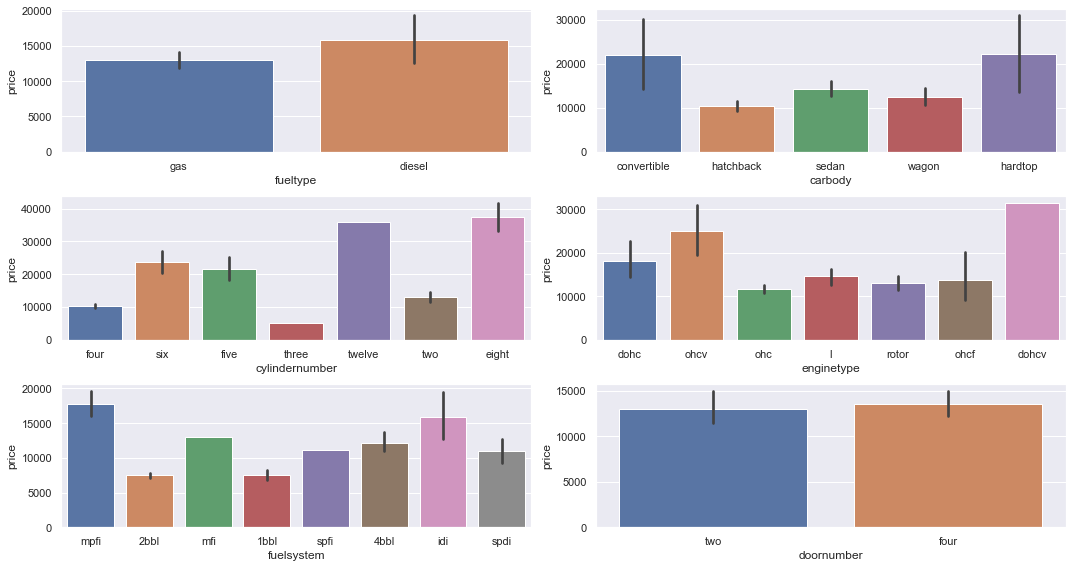

In [1061]:
fig_1, ax_1 = plt.subplots(3,2,figsize=(15,8))
sns.barplot(x='fueltype',y='price', estimator=np.mean, data=car_pricing, ax=ax_1[0][0]);
sns.barplot(x='carbody',y='price', estimator=np.mean, data=car_pricing, ax=ax_1[0][1]);
sns.barplot(x='cylindernumber',y='price', estimator=np.mean, data=car_pricing, ax=ax_1[1][0]);
sns.barplot(x='enginetype',y='price', estimator=np.mean, data=car_pricing, ax=ax_1[1][1]);
sns.barplot(x='fuelsystem',y='price', estimator=np.mean, data=car_pricing, ax=ax_1[2][0]);
sns.barplot(x='doornumber',y='price', estimator=np.mean, data=car_pricing, ax=ax_1[2][1]);
plt.tight_layout()

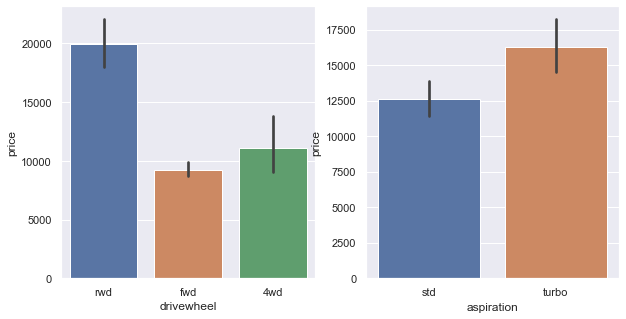

In [1062]:
fig_2, ax_2 = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='drivewheel',y='price', estimator=np.mean, data=car_pricing, ax=ax_2[0]);
sns.barplot(x='aspiration',y='price', estimator=np.mean, data=car_pricing, ax=ax_2[1]);

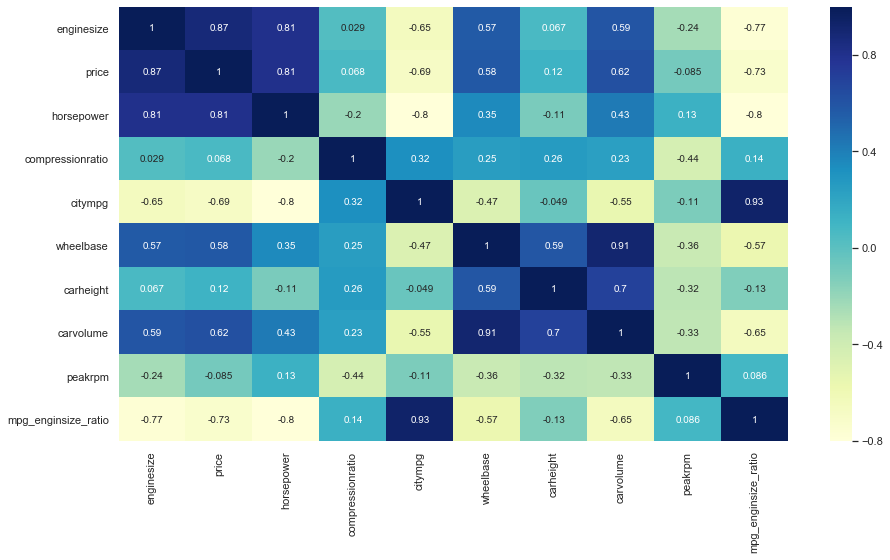

In [1063]:
fig_3, ax_3 = plt.subplots(figsize=(15,8))

heatmap_list = ['enginesize','price','horsepower','compressionratio','cylindernumber',\
                'citympg','wheelbase','carheight','carvolume', 'peakrpm','mpg_enginsize_ratio']

sns.heatmap(car_pricing[heatmap_list].corr(),cmap="YlGnBu", annot=True, ax=ax_3);

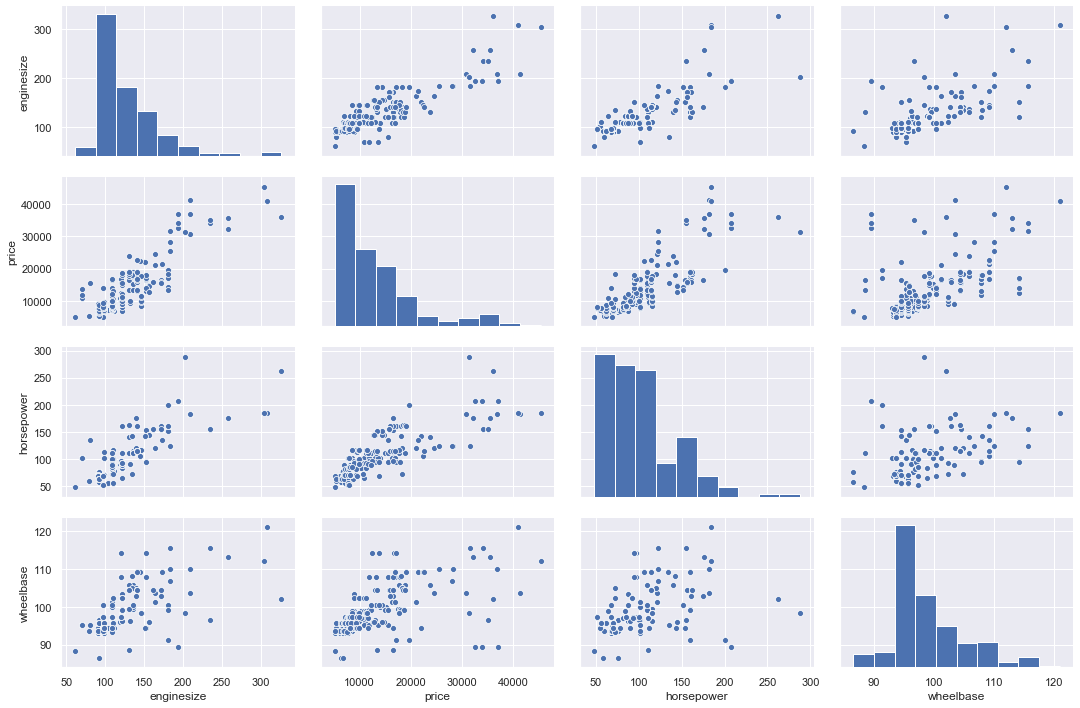

In [1178]:
pair_plot_list = ['enginesize','price','horsepower','wheelbase']
sns.pairplot(car_pricing[pair_plot_list], aspect=1.5);

In [1211]:
q1, q3= np.percentile(df_train['wheelbase'],[25,75])
iqr = q3 - q1
lb = q1 -(1.5 * iqr) 
ub = q3 +(1.5 * iqr) 

In [1212]:
lb,ub

(-0.07413793103448318, 0.8500000000000001)

In [1215]:
df_train.loc[(df_train['wheelbase'] > lb) & (df_train['wheelbase'] > ub),'wheelbase'].shape

(7,)

In [1222]:
df_train[(df_train['wheelbase']<0.6) & (df_train['wheelbase']>0.1)].shape

(113, 20)

In [1232]:
model_features

['enc_fueltype',
 'enc_enginetype',
 'horsepower',
 'enc_carbody',
 'mpg_enginsize_ratio',
 'price',
 'carvolume',
 'compressionratio',
 'enc_enginetype_new_cats',
 'enc_cylindernumber_new_cats',
 'dummy_cno_b',
 'dummy_cno_c',
 'dummy_carbody_b',
 'enc_drivewheel',
 'wheelbase',
 'enc_fuelsystem',
 'enc_cylindernumber',
 'enc_enginelocation',
 'enginesize',
 'peakrpm']

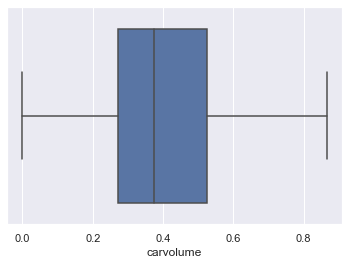

In [1237]:
sns.boxplot('carvolume',data=df_train[df_train['carvolume']<0.9])

In [1227]:
df_train[(df_train['wheelbase']<0.6) & (df_train['wheelbase']>0.1)\
                                      & (df_train['horsepower']<0.52)].shape

(108, 20)

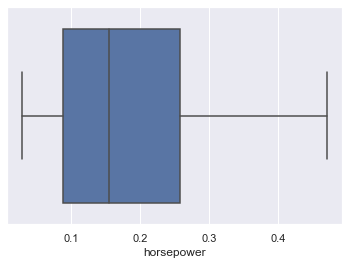

In [1226]:
sns.boxplot('horsepower',data=df_train[(df_train['wheelbase']<0.6) & (df_train['wheelbase']>0.1)\
                                      & (df_train['horsepower']<0.52)])

## Linear Regression Model Building

In [1120]:
car_pricing.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Car_Compny', 'carvolume', 'mpg_enginsize_ratio',
       'car_body_new_cats', 'enginetype_new_cats', 'cylindernumber_new_cats',
       'enc_CarName', 'enc_fueltype', 'enc_aspiration', 'enc_doornumber',
       'enc_carbody', 'enc_drivewheel', 'enc_enginelocation', 'enc_enginetype',
       'enc_cylindernumber', 'enc_fuelsystem', 'enc_Car_Compny',
       'enc_car_body_new_cats', 'enc_enginetype_new_cats',
       'enc_cylindernumber_new_cats', 'dummy_cno_b', 'dummy_cno_c',
       'dummy_carbody_b'],
      dtype='object')

#### Features Scaling

In [1360]:
model_features = ['enc_fueltype','enc_enginetype','horsepower','enc_carbody','mpg_enginsize_ratio',\
                  'price','carvolume','compressionratio','enc_enginetype_new_cats','enc_cylindernumber_new_cats'\
                 ,'dummy_cno_b','dummy_cno_c','dummy_carbody_b','enc_drivewheel','wheelbase','enc_fuelsystem'\
                 ,'enc_cylindernumber','enc_enginelocation','enginesize','peakrpm','enc_Car_Compny']
numeric_transform_vars = ['price','horsepower','carvolume','mpg_enginsize_ratio','compressionratio',\
                          'wheelbase','peakrpm','enginesize']

model_data = car_pricing[model_features].copy()
Clean_Data.transform_data(model_data)
np.random.seed(0)
df_train, df_test = train_test_split(model_data, train_size = 0.7, test_size = 0.3, random_state = 100)    
scaler = MinMaxScaler()
df_train.loc[:, numeric_transform_vars] = scaler.fit_transform(df_train[numeric_transform_vars])
reg_model = partial(create_reg_model,df_train, 'price');

/home/monish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1024]:
df_train.corr()

,enc_fueltype,enc_enginetype,horsepower,enc_carbody,mpg_enginsize_ratio,price,carvolume,compressionratio,enc_enginetype_new_cats,enc_cylindernumber_new_cats
enc_fueltype,1.000000,0.087023,0.100280,-0.156109,0.019603,-0.191150,-0.356845,-0.983638,-0.123429,-0.035791
enc_enginetype,0.087023,1.000000,-0.068988,0.017090,0.041612,-0.056253,-0.153449,-0.070753,0.392477,0.034002
horsepower,0.100280,-0.068988,1.000000,-0.077255,-0.784539,0.806183,0.437153,-0.130565,-0.553587,0.757761
enc_carbody,-0.156109,0.017090,-0.077255,1.000000,-0.055937,0.013023,0.469898,0.143827,0.176821,-0.015507
mpg_enginsize_ratio,0.019603,0.041612,-0.784539,-0.055937,1.000000,-0.733808,-0.670980,0.046790,0.417301,-0.607594
price,-0.191150,-0.056253,0.806183,0.013023,-0.733808,1.000000,0.650399,0.160847,-0.389011,0.784164
carvolume,-0.356845,-0.153449,0.437153,0.469898,-0.670980,0.650399,1.000000,0.306080,-0.178985,0.455122
compressionratio,-0.983638,-0.070753,-0.130565,0.143827,0.046790,0.160847,0.306080,1.000000,0.110328,0.033323
enc_enginetype_new_cats,-0.123429,0.392477,-0.553587,0.176821,0.417301,-0.389011,-0.178985,0.110328,1.000000,-0.510290
enc_cylindernumber_new_cats,-0.035791,0.034002,0.757761,-0.015507,-0.607594,0.784164,0.455122,0.033323,-0.510290,1.000000


#### Model 1

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.04e-34
Time:                        23:41:17   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.2

/home/monish/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


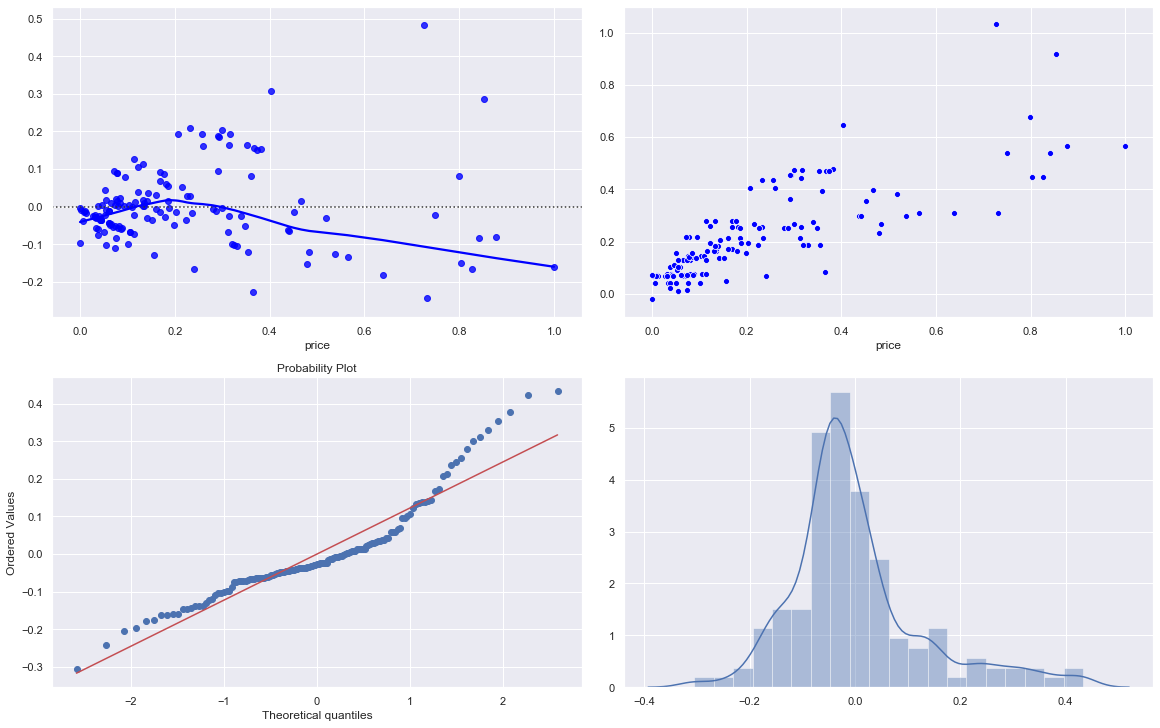

In [930]:
from functools import partial
#---------------------------------------------------------------------------------------
model_1_params = ['horsepower']
model_1 = reg_model(model_1_params)

y_actual, y_pred = make_prediction(df=df_train, features=model_1_params, \
                                  tar_var='price', model=model_1['model'])
get_model_diagnostic_plots(y_actual, y_pred)


#### Model 2

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.17e-40
Time:                        19:02:12   Log-Likelihood:                 109.17
No. Observations:                 143   AIC:                            -212.3
Df Residuals:                     140   BIC:                            -203.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1591      0.033      4.791      0.0

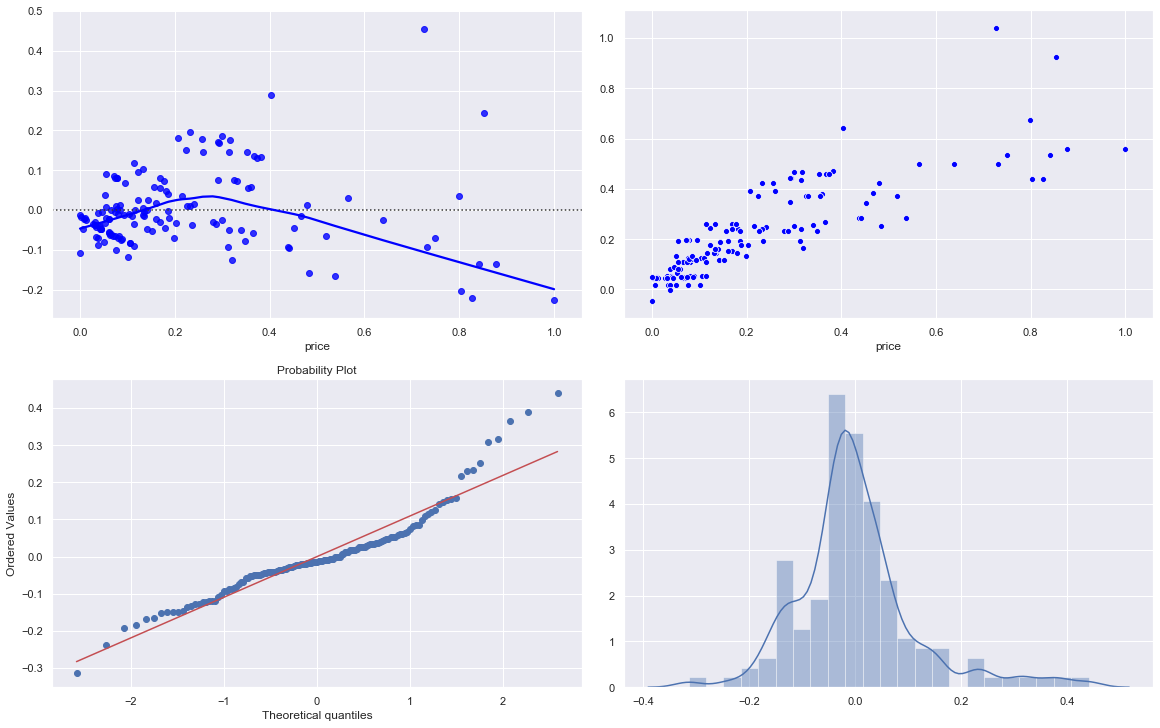

In [835]:
model_2_params = ['horsepower','enc_fueltype']
model_2 = reg_model(model_2_params)
calculate_vif(model_2['model_features'])
y_actual, y_pred = make_prediction(df=df_train, features=model_2_params, \
                                  tar_var='price', model=model_2['model'])
get_model_diagnostic_plots(y_actual, y_pred)


#### Model 3

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     122.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.47e-39
Time:                        19:51:47   Log-Likelihood:                 109.17
No. Observations:                 143   AIC:                            -210.3
Df Residuals:                     139   BIC:                            -198.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1741      0.216      0.807      0.4

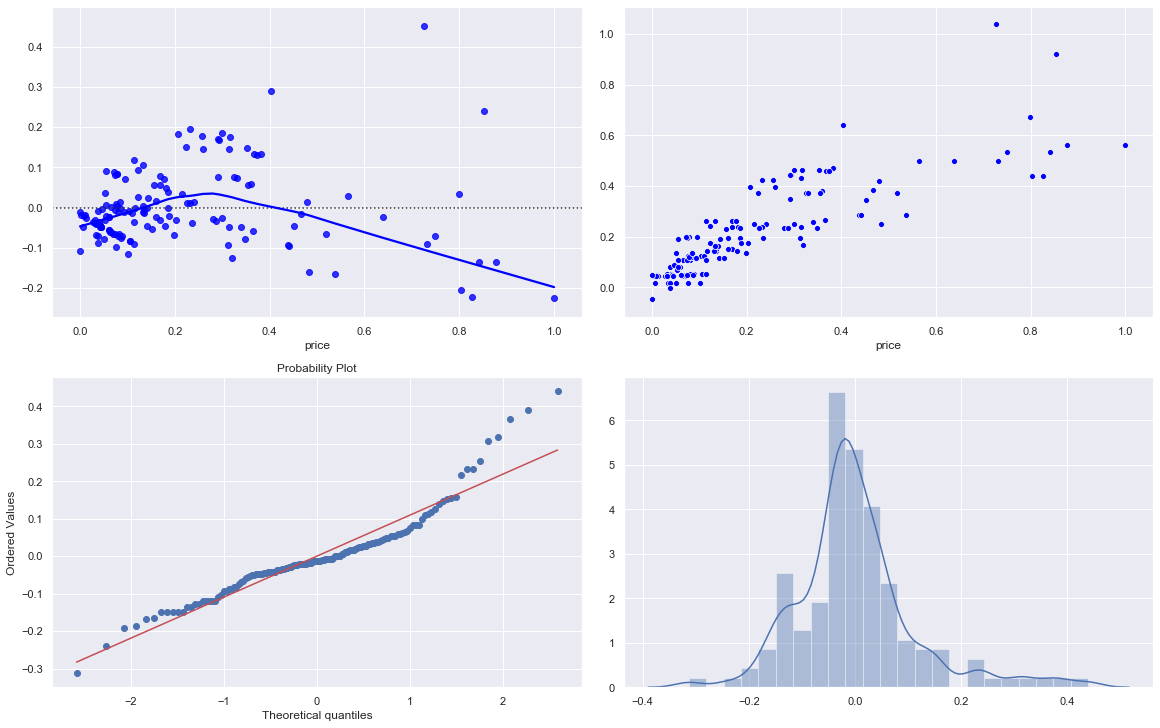

In [905]:
model_3_params = ['horsepower','compressionratio','enc_fueltype']
reg_model = partial(create_reg_model,df_train, 'price');
model_3 = reg_model(model_3_params)
calculate_vif(model_3['model_features'])
y_actual, y_pred = make_prediction(df=df_train, features=model_3_params, \
                                  tar_var='price', model=model_3['model'])
get_model_diagnostic_plots(y_actual, y_pred)


#### Model 4

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     99.07
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.42e-39
Time:                        20:03:00   Log-Likelihood:                 113.73
No. Observations:                 143   AIC:                            -217.5
Df Residuals:                     138   BIC:                            -202.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0516      0.061      0.846      0.3

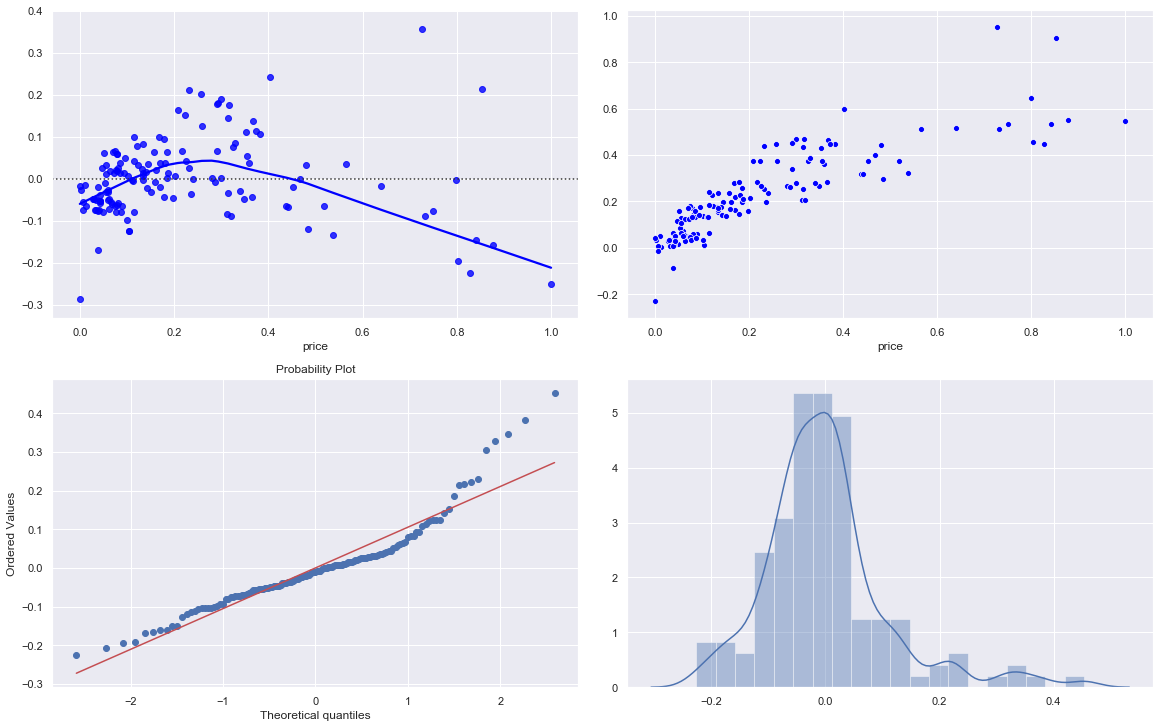

In [909]:
model_4_params = ['horsepower','mpg_enginsize_ratio','compressionratio','enc_carbody']
reg_model = partial(create_reg_model,df_train, 'price');
model_4 = reg_model(model_4_params)
calculate_vif(model_4['model_features'])
y_actual, y_pred = make_prediction(df=df_train, features=model_4_params, \
                                  tar_var='price', model=model_4['model'])
get_model_diagnostic_plots(y_actual, y_pred)


#### Model 5

In [1366]:
model_5_params = ['horsepower', 'wheelbase', 'enc_Car_Compny']

source_dat = df_train[(df_train['wheelbase']<0.5) & (df_train['wheelbase']>0.1)\
                                      & (df_train['horsepower']<0.35)]
model_5 = reg_model(model_5_params)
calculate_vif(model_5['model_features'])
y_actual, y_pred = make_prediction(df=source_dat,features=model_5_params,\
                                  tar_var='price', model=model_5['model'])



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     182.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.82e-48
Time:                        22:09:34   Log-Likelihood:                 131.23
No. Observations:                 143   AIC:                            -254.5
Df Residuals:                     139   BIC:                            -242.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0644      0.025     -2.628      0.0

##### Linear Regression Model Equation
$price$ = $0.84*horsepower$+ $0.40*wheelbase$+$(-0.0052)*car company$

- There is a 1 unit change in horsepower keeping rest constant, then average change in price is 0.84 standard deviation.

- There is a 1 unit change in wheelbase keeping rest constant, then average change in price is 0.40 standard deviation.

- There is a change in car company keeping rest constant, then average change in price is -0.0052 standard deviation.

#### Model Evaluation

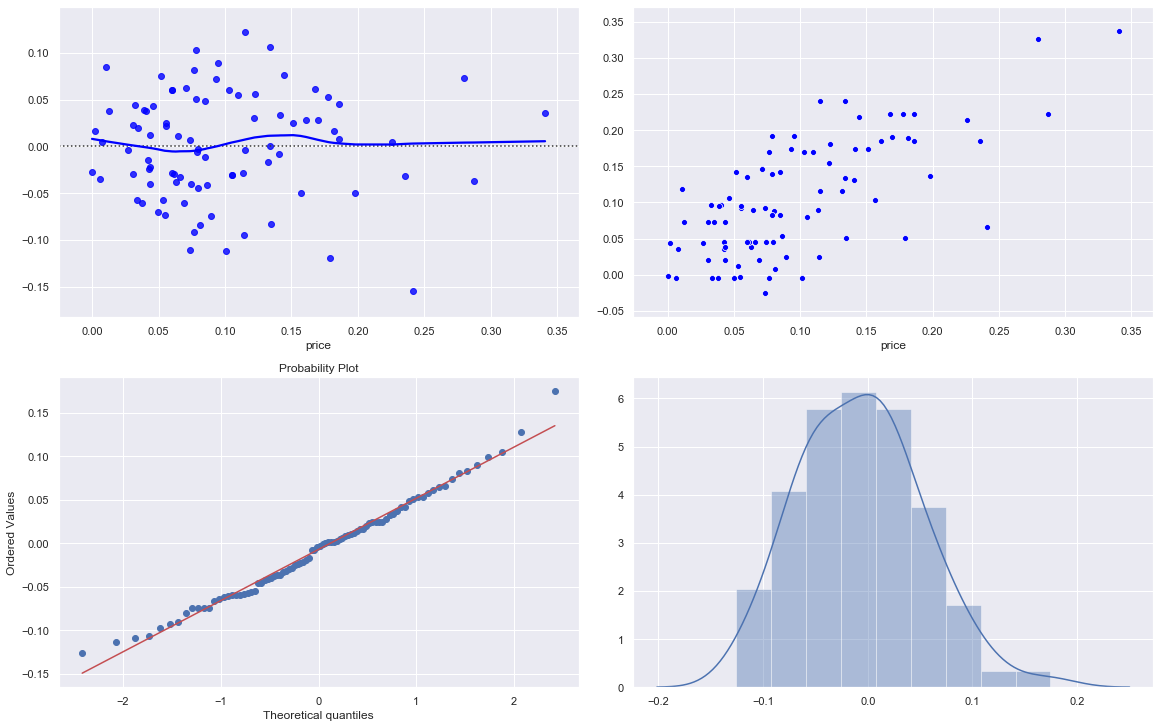

In [1369]:
get_model_diagnostic_plots(y_actual, y_pred)

## Model Testing and Prediction on the test data

In [625]:
import scipy as sp

/home/monish/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/monish/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


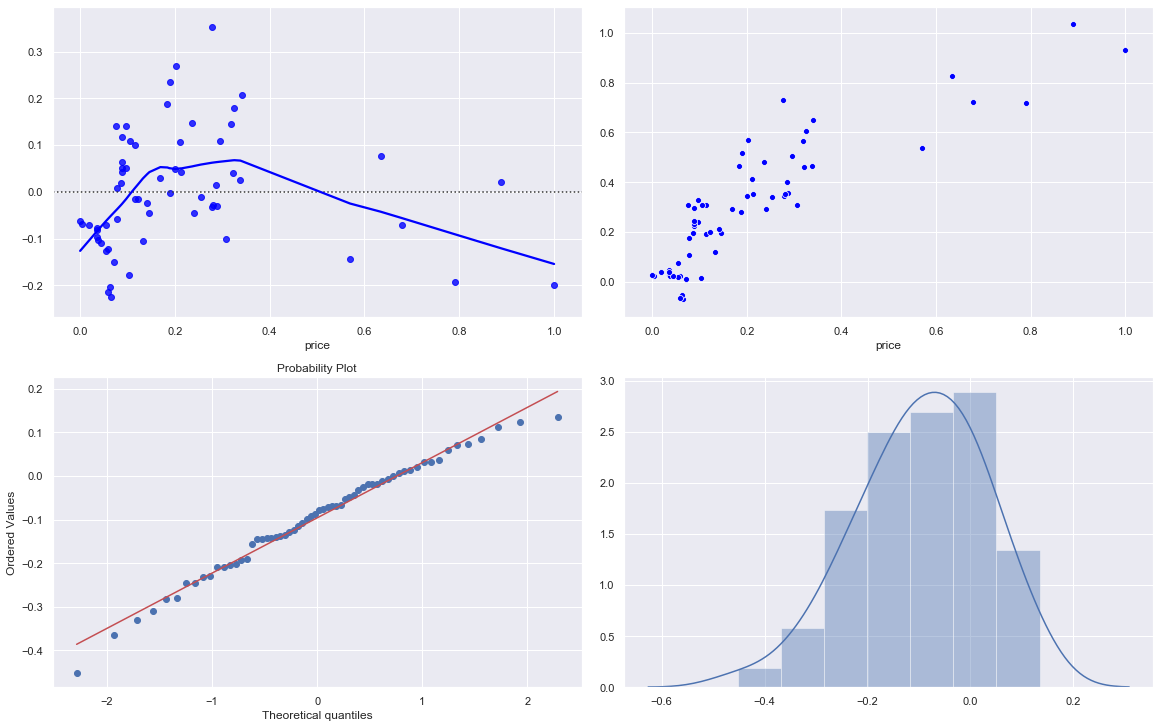

In [1372]:
y_test, y_pred = test_model(df_test, 'price',  numeric_transform_vars, model_5_params, model_5['model'])
get_model_diagnostic_plots(y_test, y_pred)



In [1384]:
mean_absolute_error = round(sm.tools.eval_measures.meanabs(y_test, y_pred),2)
root_mean_square_error = round(sm.tools.eval_measures.rmse(y_test, y_pred),2)
r_square = round(model_5['model'].rsquared,2)*100

print(f'Mean absolute error is {mean_absolute_error}')
print(f'Root mean square error is {root_mean_square_error}')
print(f'R square value is {r_square}%')

Mean absolute error is 0.12
Root mean square error is 0.16
R square value is 80.0%


#### Regression plot on Actual Value vs Predicted values (on standardized scale)

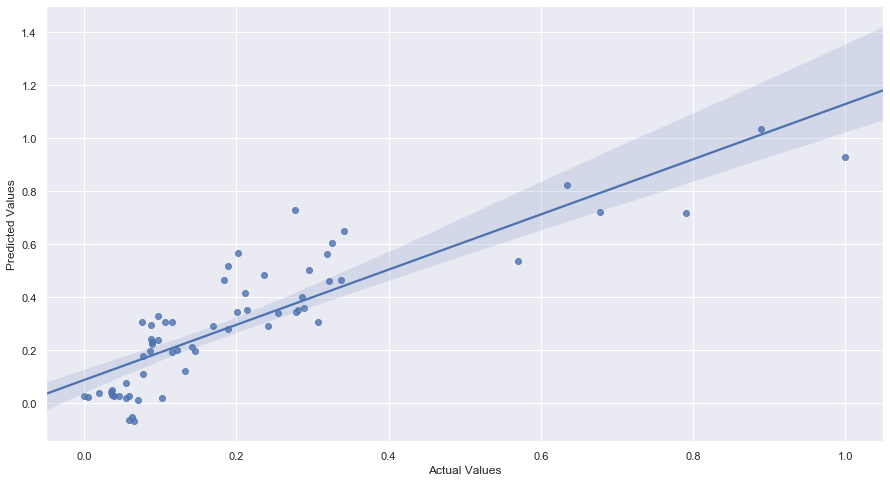

In [1391]:
fig_reg, ax_reg = plt.subplots(1,1,figsize=(15,8))
sns.regplot(y_test,y_pred, ax=ax_reg);
ax_reg.set_xlabel('Actual Values');
ax_reg.set_ylabel('Predicted Values');